In [1]:
import os
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import glob as gb

os.getcwd()
os.chdir('C:\\Users\\andriel24044\\Downloads\\2024_Capitais\\2024')
file_pattern = 'C:\\Users\\andriel24044\\Downloads\\2024_Capitais\\2024\\*.csv'

df = pd.read_csv('INMET_CO_GO_A002_GOIANIA_01-01-2024_A_30-04-2024.CSV', skiprows=8, delimiter=';', encoding='latin1')


In [2]:
df.drop(columns=['Unnamed: 19'], inplace=True)

df['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d')
df['Hora UTC'] = pd.to_datetime(df['Hora UTC'], format='%H%M UTC')

df['Hora'] = df['Hora UTC'].dt.hour

def categorize_hour(hour):
    if 0 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour <= 18:
        return 'Tarde'
    else:
        return 'Noite'

df['Periodo'] = df['Hora'].apply(categorize_hour)

df_grouped = df.groupby(['Data', 'Periodo']).agg(
    Precipitacao=('PRECIPITAÇÃO TOTAL. HORÁRIO (mm)', 'mean'),
    Radiacao=('RADIACAO GLOBAL (Kj/m²)', 'mean'),
    Temp_Max=('TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'mean'),
    Temp_Min=('TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'mean'),
    Umidade=('UMIDADE RELATIVA DO AR. HORARIA (%)', 'mean'),
    Vento_Vel=('VENTO. VELOCIDADE HORARIA (m/s)', 'mean'),
    Vento_Raj=('VENTO. RAJADA MAXIMA (m/s)', 'mean')
).reset_index().round(2)

meses_pt = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

df_grouped['Mês'] = df_grouped['Data'].dt.month.map(meses_pt)
df_grouped.insert(0, 'Mês', df_grouped.pop('Mês'))

In [3]:
df_grouped['Dia'] = df_grouped['Data'].dt.strftime('%d-%a')

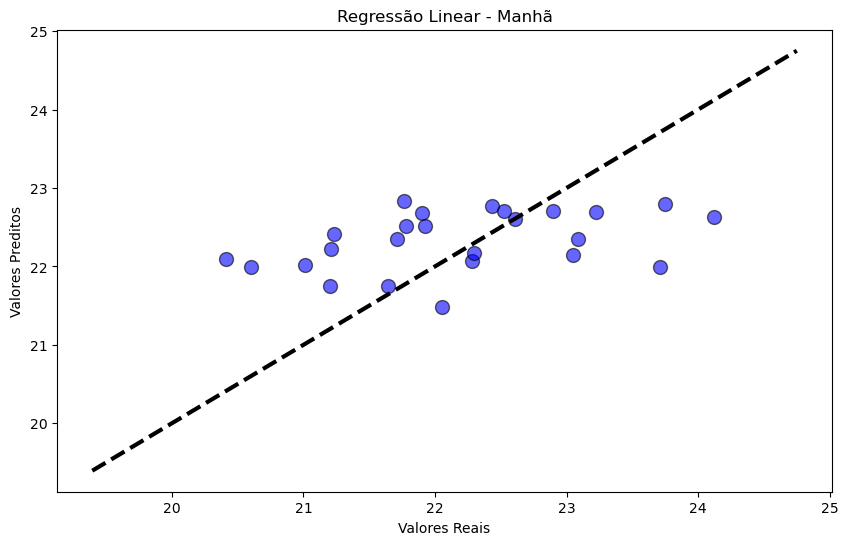

Período: Manhã
Mean Squared Error: 0.7948537562632925
R²: 0.13222919885837903



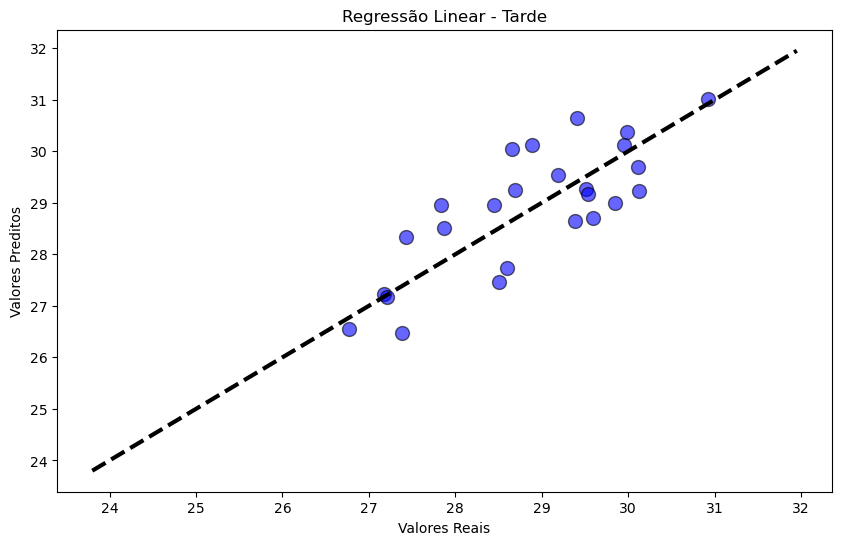

Período: Tarde
Mean Squared Error: 0.5712946251720726
R²: 0.5171437104286776



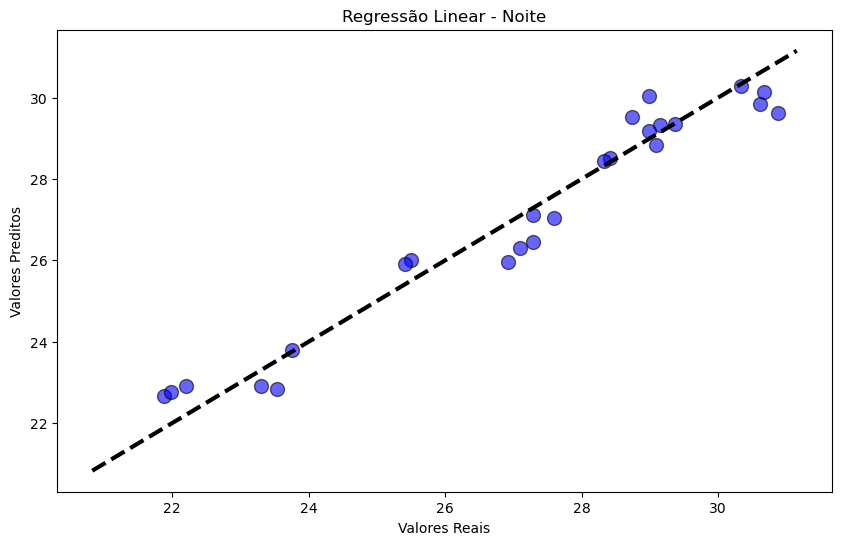

Período: Noite
Mean Squared Error: 0.39125733923984657
R²: 0.9504440962591477



'print(f"Mean Squared Error: {mse}")\nprint(f"R^2 Score: {r2}")\n\nplt.scatter(y_test, y_pred)\nplt.xlabel("Valores Reais")\nplt.ylabel("Valores Previstos")\nplt.title("Regressão Linear - Temperatura Média")\nplt.show()'

In [9]:
df_grouped = df_grouped.dropna()
df_grouped['Temp_Med'] = df_grouped[['Temp_Max', 'Temp_Min']].mean(axis=1)

#X = df_grouped[['Precipitacao','Radiacao','Umidade','Vento_Vel','Vento_Raj']]
#y = df_grouped['Temp_Med']

manha = df_grouped[df_grouped['Periodo'] == 'Manhã']
tarde = df_grouped[df_grouped['Periodo'] == 'Tarde']
noite = df_grouped[df_grouped['Periodo'] == 'Noite']

def treinar(dados, periodo):
    X = dados[['Precipitacao', 'Radiacao', 'Umidade', 'Vento_Vel', 'Vento_Raj']]
    y = dados['Temp_Med']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    return model


model_manha = treinar(manha, 'Manhã')
model_tarde = treinar(tarde, 'Tarde')
model_noite = treinar(noite, 'Noite')

'''print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão Linear - Temperatura Média")
plt.show()'''

#df_grouped.to_csv('teste.csv', index=False)

#coefficients = pd.DataFrame(model_manha.coef_, X.columns, columns=['Coeficiente'])

In [5]:
data_proximos_meses = pd.read_csv('teste.csv', delimiter = ',', encoding='ISO-8859-1')
data_proximos_meses.head()

,MÃªs,Data,Periodo,Precipitacao,Radiacao,Temp_Max,Temp_Min,Umidade,Vento_Vel,Vento_Raj,Dia,Temp_Med
0,Janeiro,2024-01-01,ManhÃ£,0.00,522.40,22.87,22.18,84.75,0.18,1.64,01-Mon,22.525
1,Janeiro,2024-01-01,Noite,0.32,462.28,27.86,25.98,69.40,1.42,4.60,01-Mon,26.920
2,Janeiro,2024-01-01,Tarde,0.00,2293.30,29.21,27.69,56.57,1.24,4.34,01-Mon,28.450
3,Janeiro,2024-01-02,ManhÃ£,2.78,354.37,21.35,20.80,92.17,0.29,2.62,02-Tue,21.075
4,Janeiro,2024-01-02,Noite,0.00,1038.15,29.64,27.42,64.20,1.18,4.50,02-Tue,28.530


In [6]:
m = data_proximos_meses[data_proximos_meses['Periodo'] == 'Manha']
t = data_proximos_meses[data_proximos_meses['Periodo'] == 'Tarde']
n = data_proximos_meses[data_proximos_meses['Periodo'] == 'Noite']

X_novos_manha = m[["Precipitacao", "Radiacao", "Umidade", "Vento_Vel", "Vento_Raj"]]
X_novos_tarde = t[["Precipitacao", "Radiacao", "Umidade", "Vento_Vel", "Vento_Raj"]]
X_novos_noite = n[["Precipitacao", "Radiacao", "Umidade", "Vento_Vel", "Vento_Raj"]]

temperatura_prevista_manha = model_manha.predict(X_novos_manha)
temperatura_prevista_tarde = model_tarde.predict(X_novos_tarde)
temperatura_prevista_noite = model_noite.predict(X_novos_noite)

data_proximos_meses.loc[data_proximos_meses['Periodo'] == 'Manha', 'Temperatura_Prevista'] = temperatura_prevista_manha
data_proximos_meses.loc[data_proximos_meses['Periodo'] == 'Tarde', 'Temperatura_Prevista'] = temperatura_prevista_tarde
data_proximos_meses.loc[data_proximos_meses['Periodo'] == 'Noite', 'Temperatura_Prevista'] = temperatura_prevista_noite

plt.figure(figsize=(10, 5))
plt.plot(data_proximos_meses["Data"], data_proximos_meses["Temperatura_Prevista"], marker='o')
plt.xlabel("Data")
plt.ylabel("Temperatura Média Prevista")
plt.title("Previsão da Temperatura Média para os Próximos Meses")
plt.grid(True)
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LinearRegression.

In [ ]:
data_proximos_meses.head()